In [312]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

fname='/data9/GR6901/data/sst.mnmean.nc'

In [313]:
df=xr.open_dataset(fname, drop_variables=['time_bnds'])
df=df.sel(time=slice('1950', '2024')).load()
df

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 890)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2024-02-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2024-03-03

## 1. Reproduce the SST curve from the figure below

(-7305.0, 19754.0)

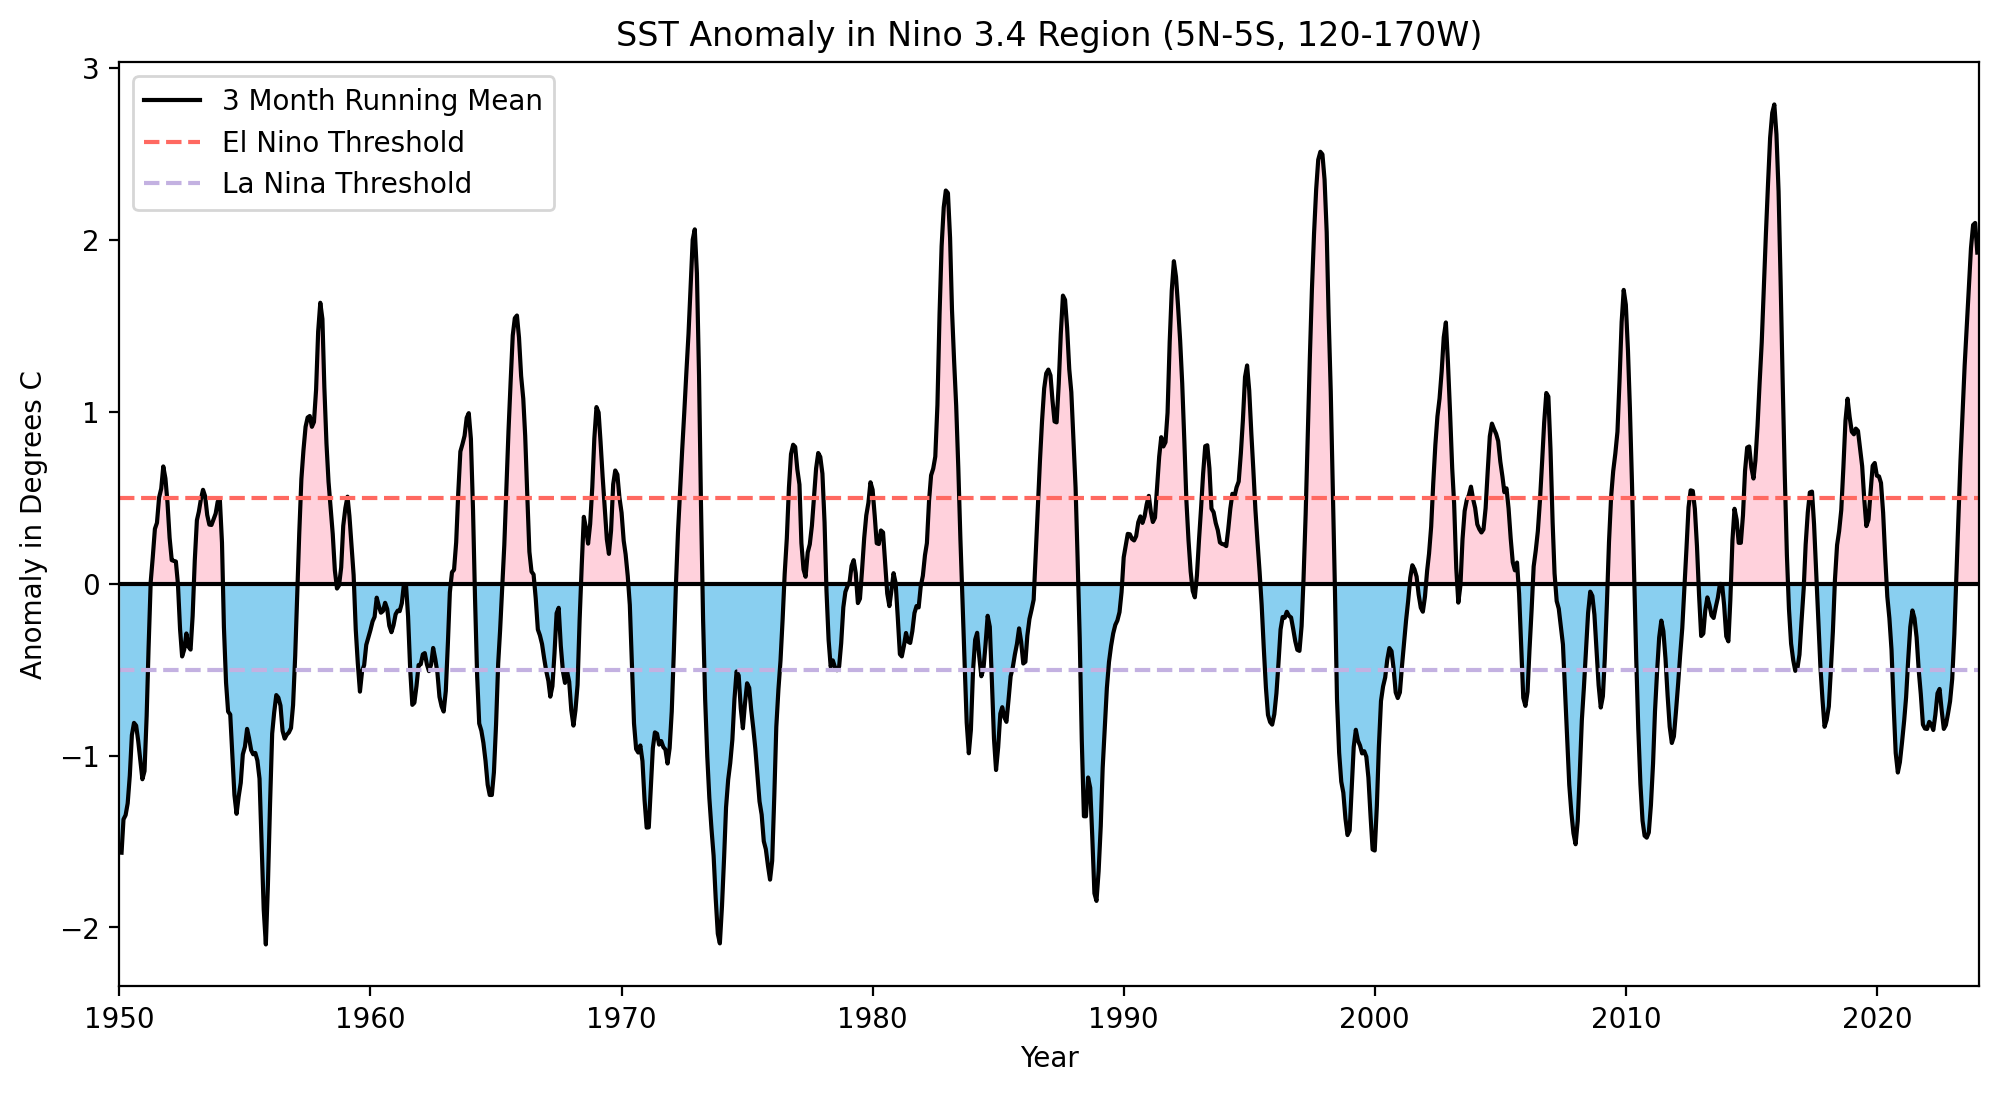

In [272]:
dfEN=df.sel(lat=slice(5,-5),lon=slice(190,240)).load()
dfEN

def remove_time_mean(x):
    return x - x.mean(dim='time')

dfEN_anom = dfEN.groupby('time.month').apply(remove_time_mean)
avg_dfEN_anom=dfEN_anom.sst.mean(dim=(['lat','lon']))

avg_dfEN_anom

dfEN_anom_resample = avg_dfEN_anom.rolling(time=3,center=True).mean()#.dropna("time")
dfEN_anom_resample

plt.plot(dfEN_anom_resample.time,dfEN_anom_resample,color='black',label='3 Month Running Mean')
plt.hlines(0.5,xmin=min(dfEN_anom_resample.time),xmax=max(dfEN_anom_resample.time),color='#FF6961',linestyle='--',label='El Nino Threshold')
plt.hlines(-0.5,xmin=min(dfEN_anom_resample.time),xmax=max(dfEN_anom_resample.time),color='#C3B1E1',linestyle='--',label='La Nina Threshold')
plt.hlines(0,xmin=min(dfEN_anom_resample.time),xmax=max(dfEN_anom_resample.time),color='black')
plt.fill_between(dfEN_anom_resample.time, dfEN_anom_resample, where=dfEN_anom_resample>=0, interpolate=True, color='#FFD1DC')
plt.fill_between(dfEN_anom_resample.time, dfEN_anom_resample, where=dfEN_anom_resample<=0, interpolate=True, color='#89CFF0')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S, 120-170W)')
plt.legend()
plt.xlim([min(dfEN_anom_resample.time),max(dfEN_anom_resample.time)])

## 2. Calculate boolean timeseries representing the positive / negative ENSO phases

### Warm or cold phases of the Oceanic Niño Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above the threshold of +0.5°C (warm), or below the threshold of -0.5°C (cold). This is known as the Oceanic Niño Index (ONI).

In [314]:
dfEN_anom_resample 

warm_threshold=dfEN_anom_resample>0.5
cold_threshold=dfEN_anom_resample<-0.5



warm_store=[]
cold_store=[]

for i in np.arange(5,len(warm_threshold)+1):
    warm_store.append(int(sum(warm_threshold[i-5:i])>=5))
    cold_store.append(-int(sum(cold_threshold[i-5:i])>=5))

In [345]:
warm_store=((dfEN_anom_resample>0.5).rolling(time=5,center=True).sum()==5)
cold_store=((dfEN_anom_resample<-0.5).rolling(time=5,center=True).sum()==5)
warm_events=warm_store[warm_store==True]
cold_events=cold_store[cold_store==True]


<xarray.DataArray 'sst' (time: 890)>
array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
...
        True,  True,  True,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True])
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2024-02-01

(-7305.0, 19754.0)

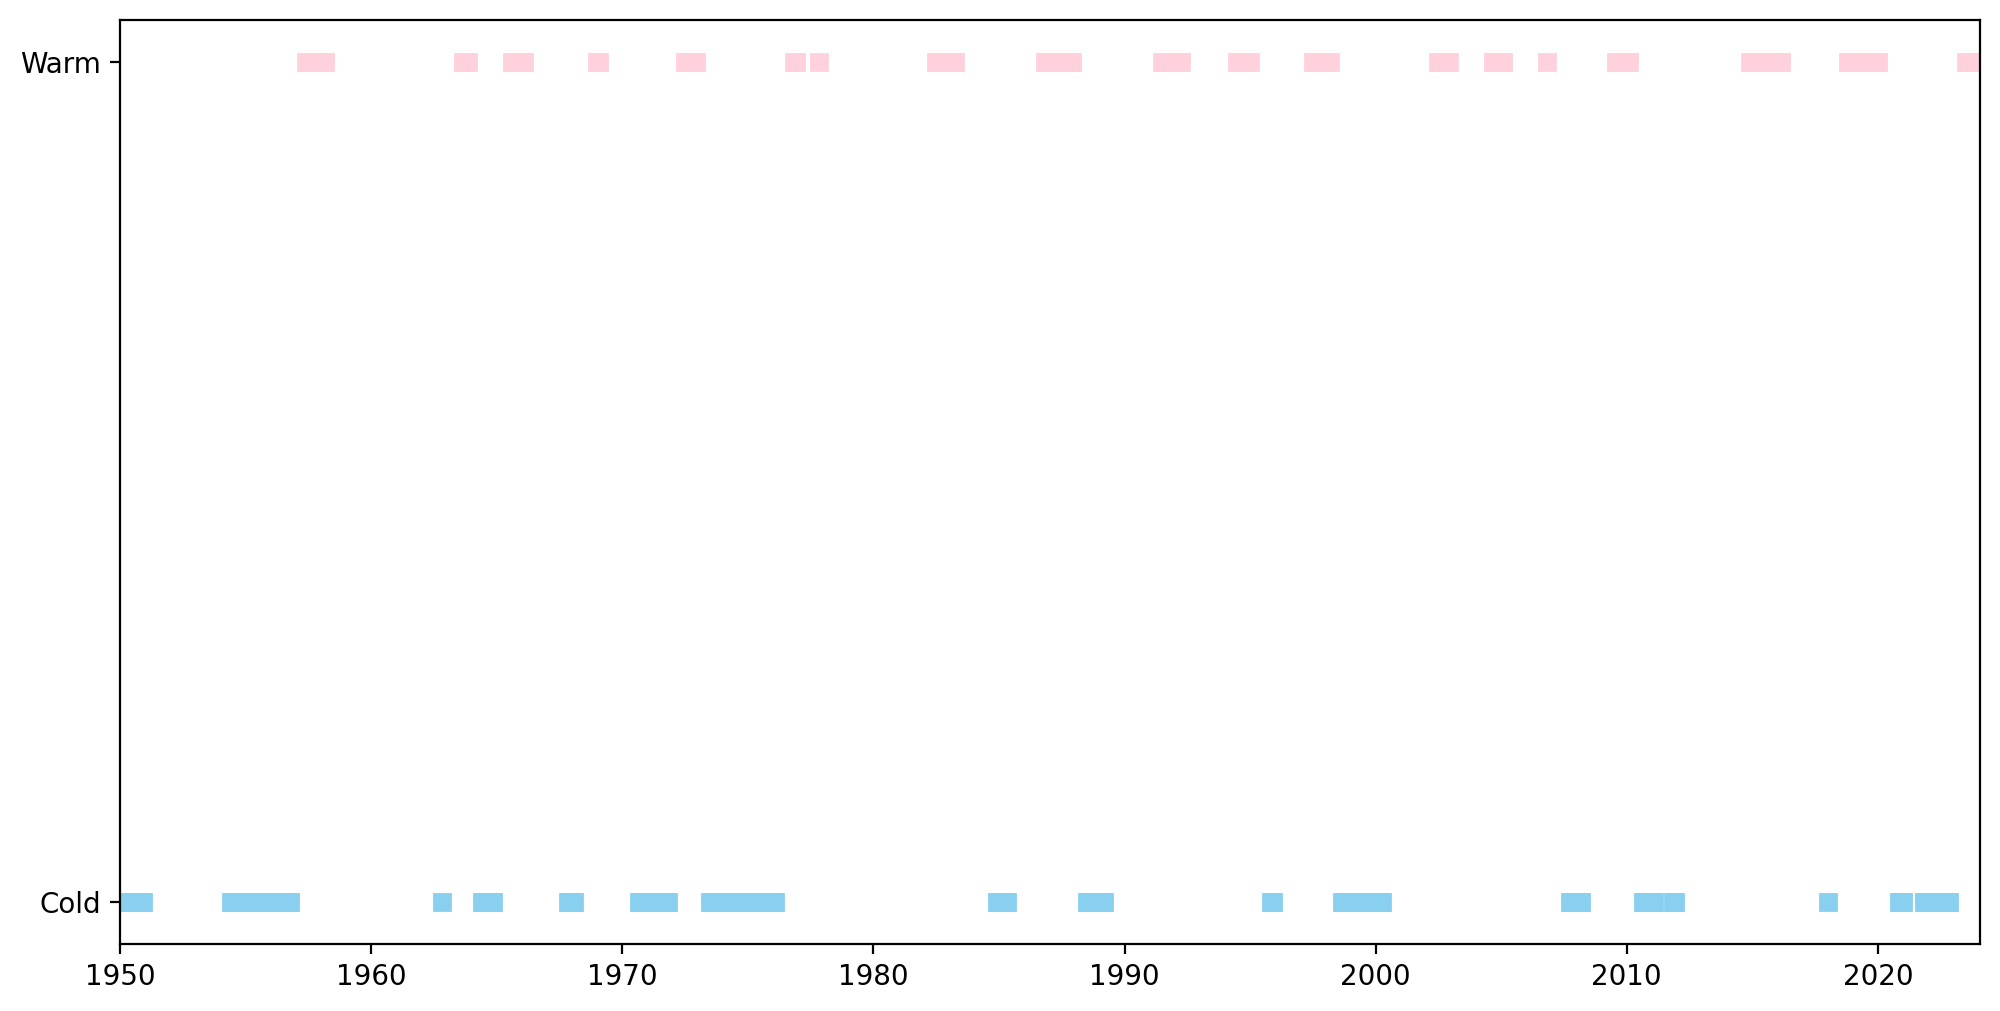

In [348]:
plt.plot(warm_events.time,warm_events,'s',color='#FFD1DC')
plt.plot(cold_events.time,cold_events*0,'s',color='#89CFF0')
plt.yticks([0,1],('Cold','Warm'))
plt.xlim([min(dfEN_anom_resample.time),max(dfEN_anom_resample.time)])

Text(0, 0.5, 'Latitude')

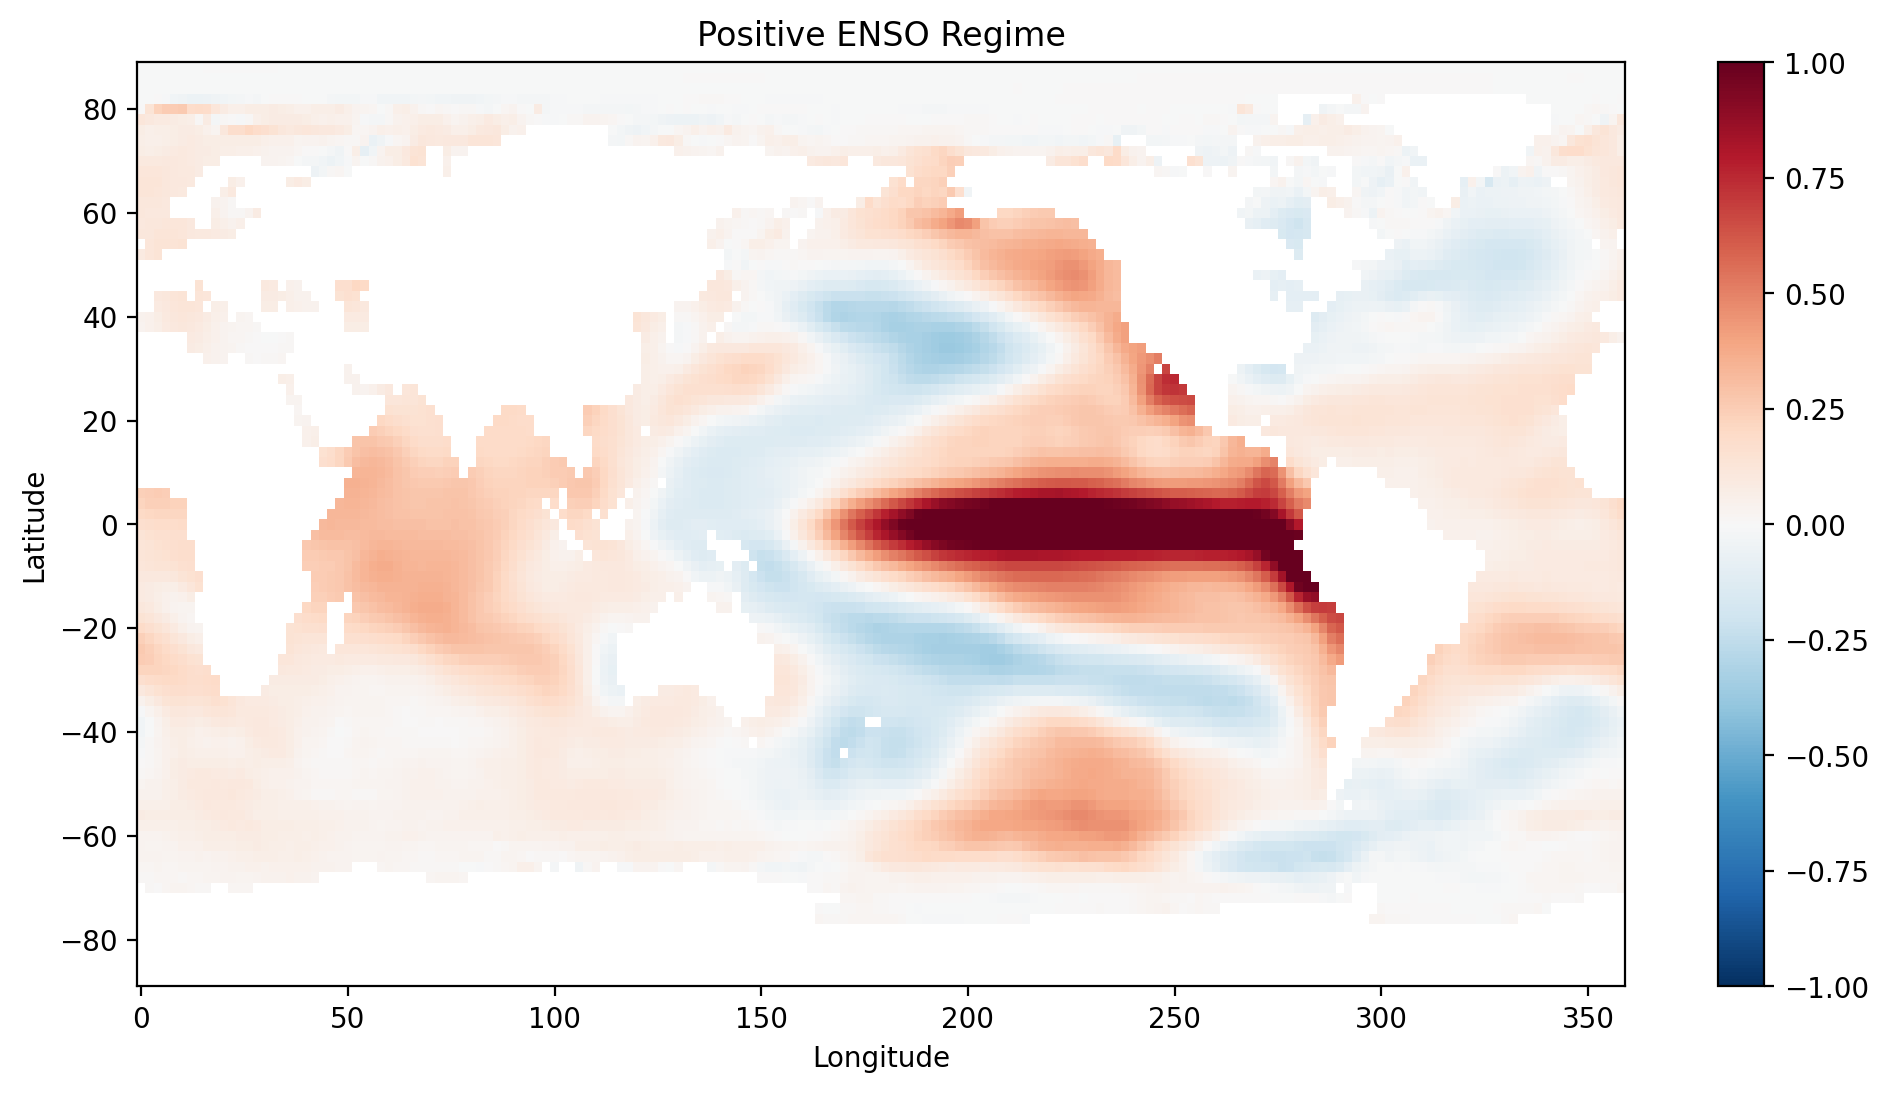

In [374]:
dfEN_anom_glob=df.groupby('time.month').apply(remove_time_mean)
positive_oni=((warm_threshold).rolling(time=5, center=True).sum()==5).rolling(time=5, center=True, min_periods=1).max()
positive_plot=dfEN_anom_glob.where(positive_oni).mean(dim='time')

mesh=plt.pcolormesh(positive_plot.lon,positive_plot.lat,positive_plot.sst,cmap='RdBu_r')
mesh.set_clim(-1,1)
plt.colorbar()
plt.title('Positive ENSO Regime')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


Text(0, 0.5, 'Latitude')

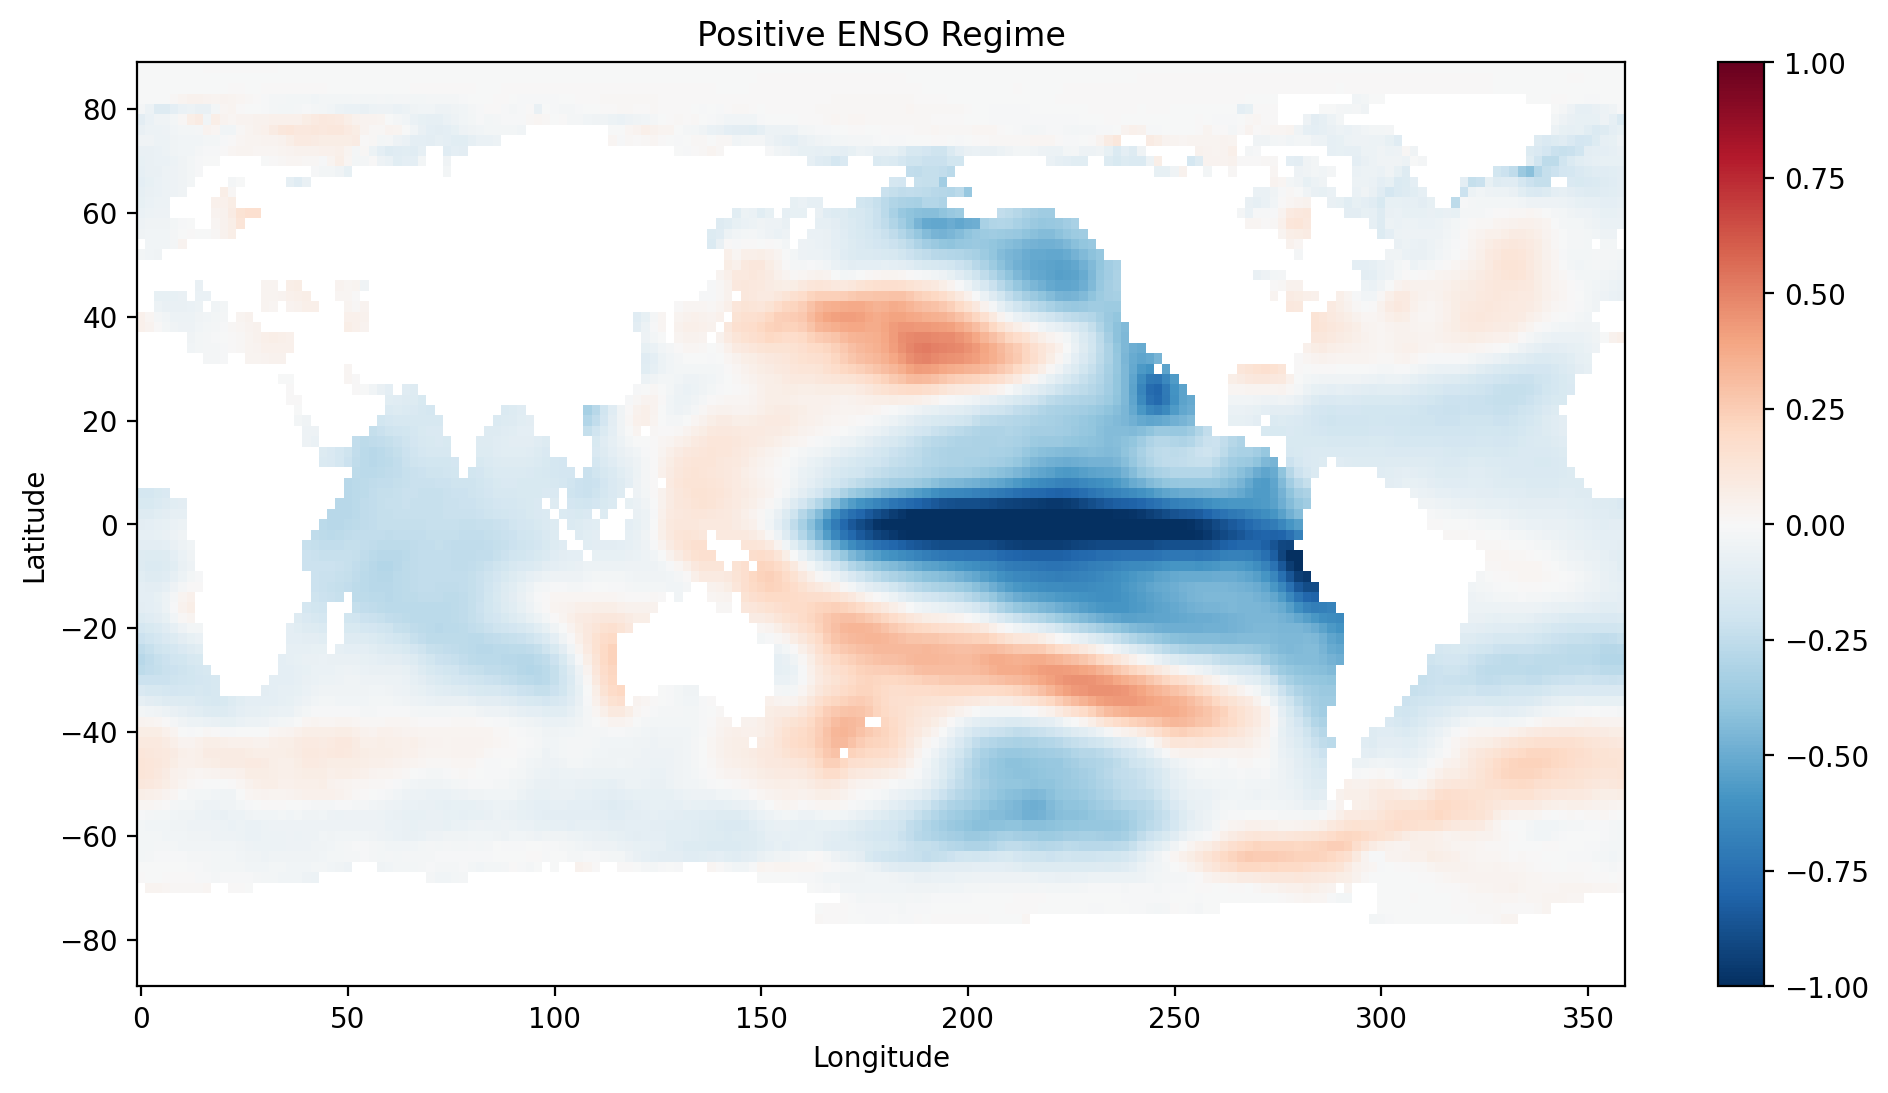

In [375]:
dfEN_anom_glob=df.groupby('time.month').apply(remove_time_mean)
negative_oni=((cold_threshold).rolling(time=5, center=True).sum()==5).rolling(time=5, center=True, min_periods=1).max()
negative_plot=dfEN_anom_glob.where(negative_oni).mean(dim='time')

mesh=plt.pcolormesh(negative_plot.lon,negative_plot.lat,negative_plot.sst,cmap='RdBu_r')
mesh.set_clim(-1,1)
plt.colorbar()
plt.title('Positive ENSO Regime')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


## 4. Calculate the composite of preciptiation for positive and negative ENSO phases.

In [289]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS'))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

<xarray.Dataset>
Dimensions:  (time: 356, Y: 72, X: 144)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 1989-08-01
  * Y        (Y) float32 88.75 86.25 83.75 81.25 ... -81.25 -83.75 -86.25 -88.75
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    prcp     (time, Y, X) float32 nan nan nan nan ... 0.6489 0.6437 0.636 0.6303
Attributes:
    Conventions:  IRIDL

In [384]:
postive_prcp=dsp.prcp.where(positive_oni).mean(dim='time')
negative_prcp=dsp.prcp.where(positive_oni).mean(dim='time')


Text(0, 0.5, 'Latitude')

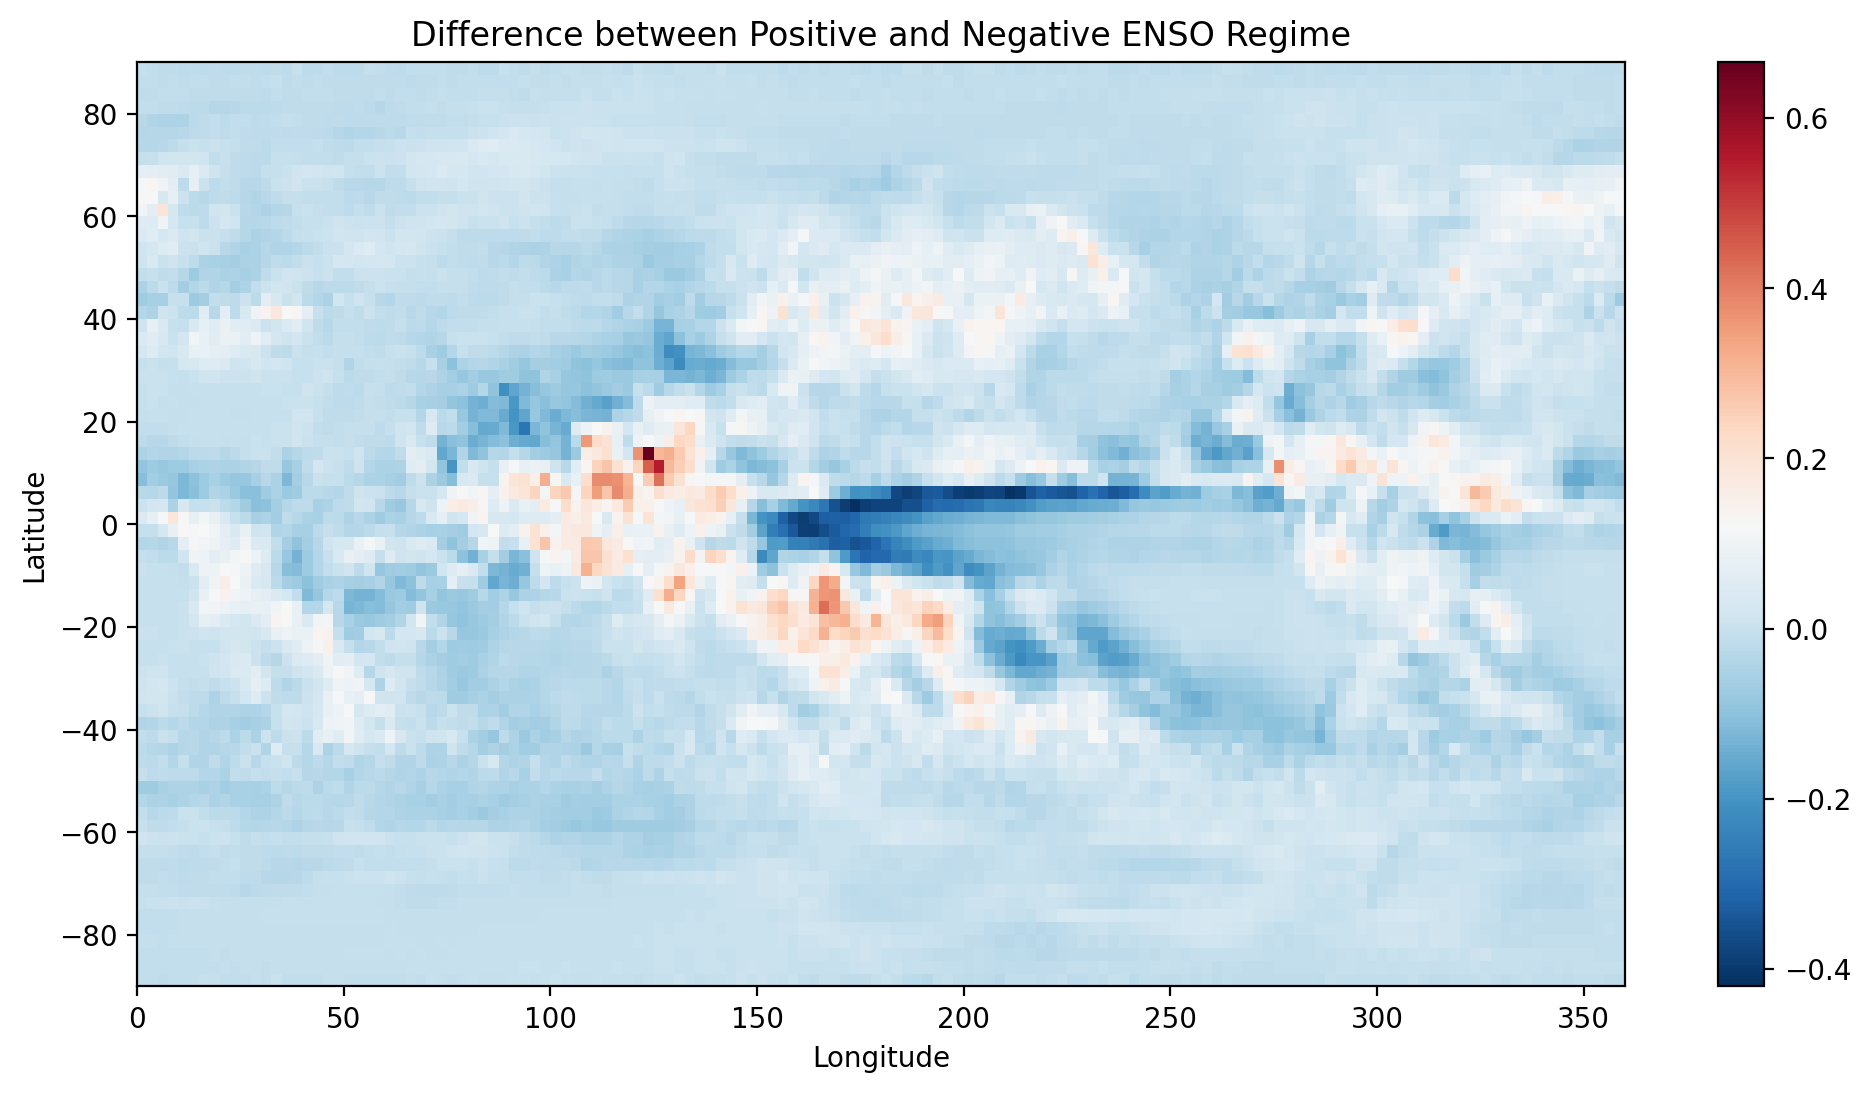

In [385]:

mesh=plt.pcolormesh(negative_prcp.X,negative_prcp.Y,positive_prcp-negative_prcp,cmap='RdBu_r')

plt.colorbar()
plt.title('Difference between Positive and Negative ENSO Regime')
plt.xlabel('Longitude')
plt.ylabel('Latitude')